In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target
X.shape[1]

4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 40ms/step - loss: 0.5970 - accuracy: 0.9062 - val_loss: 0.6848 - val_accuracy: 0.9167
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5949 - accuracy: 0.9062 - val_loss: 0.6818 - val_accuracy: 0.9167
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.5929 - accuracy: 0.8958 - val_loss: 0.6792 - val_accuracy: 0.9583
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5907 - accuracy: 0.8958 - val_loss: 0.6768 - val_accuracy: 0.9583
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5886 - accuracy: 0.9062 - val_loss: 0.6747 - val_accuracy: 0.9583
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5866 - accuracy: 0.9062 - val_loss: 0.6726 - val_accuracy: 0.9583
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5844 - accuracy: 0.9062 - val_loss: 0.6701 - val_accuracy: 0.9583
Epoch 8/50
3/3 [===========

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy:{accuracy}')

1/1 [==============================] - 0s 25ms/step - loss: 0.5212 - accuracy: 0.9667
Test_Accuracy:0.9666666388511658


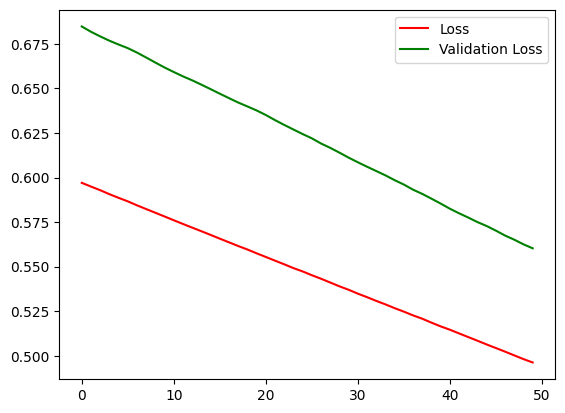

In [ ]:
plt.plot(history.history['loss'], label='Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='g')
plt.legend()

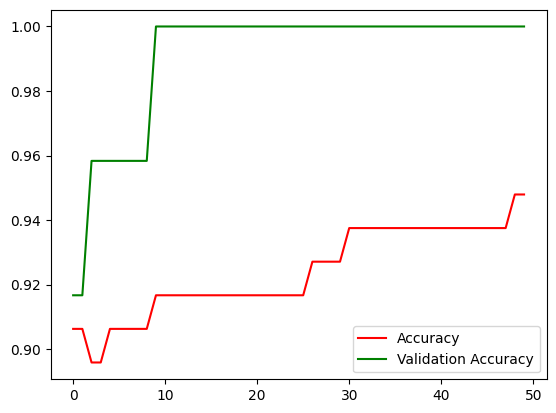

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.legend()

In [ ]:
model.save('iris_saved_model')  # Save trained model

**Train model with new data through previously trained saved model**

In [ ]:
saved_model = load_model('iris_saved_model') # Load previouly saved model

In [ ]:
prediction = saved_model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print('Predicted Values are : ', end='\n\n')
prediction # Show the results of prediction value of new data

Predicted Values are : 



array([[2.2913212e-01, 4.5946005e-01, 3.1140772e-01],
       [9.5680285e-01, 4.2651970e-02, 5.4526230e-04],
       [1.3289702e-01, 3.4848216e-01, 5.1862073e-01],
       [2.2961184e-01, 4.5984989e-01, 3.1053823e-01],
       [2.6225188e-01, 4.8287332e-01, 2.5487477e-01],
       [9.4043368e-01, 5.8543976e-02, 1.0222802e-03],
       [4.1978794e-01, 4.4977000e-01, 1.3044205e-01],
       [1.6370249e-01, 3.9151481e-01, 4.4478273e-01],
       [1.7007028e-01, 3.9947376e-01, 4.3045598e-01],
       [3.4682080e-01, 4.7516742e-01, 1.7801169e-01],
       [1.6745608e-01, 3.9624339e-01, 4.3630052e-01],
       [9.1717392e-01, 8.0871396e-02, 1.9545560e-03],
       [9.6132183e-01, 3.8238712e-02, 4.3950923e-04],
       [9.1985834e-01, 7.8310043e-02, 1.8316181e-03],
       [9.4903022e-01, 5.0216291e-02, 7.5339555e-04],
       [2.6414442e-01, 4.8399976e-01, 2.5185573e-01],
       [1.3289702e-01, 3.4848216e-01, 5.1862073e-01],
       [2.8986418e-01, 4.8572460e-01, 2.2441114e-01],
       [2.0968670e-01, 4.423

In [ ]:
predicted_classes = np.argmax(prediction, axis=1)
print('Predicted Classes: ', predicted_classes)  # Show the results of prediction, index of max value

Predicted Classes:  [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
print('Actual Classes: ', y_test) # Show the results of actual value of index (dataset input values)

Actual Classes:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**Epochs with Check Point**

In [ ]:
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = 'iris_saved_model'  # Include saved model
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='vall_accuracy',
    mode='max',
    save_weights_only=False,
    save_best_only=True
)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7998 - accuracy: 0.7812

3/3 [==============================] - 0s 57ms/step - loss: 0.9461 - accuracy: 0.6458 - val_loss: 0.9310 - val_accuracy: 0.7083
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 0.9360 - accuracy: 0.6562

3/3 [==============================] - 0s 27ms/step - loss: 0.9290 - accuracy: 0.6458 - val_loss: 0.9197 - val_accuracy: 0.7083
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8651 - accuracy: 0.7188

3/3 [==============================] - 0s 29ms/step - loss: 0.9121 - accuracy: 0.6458 - val_loss: 0.9091 - val_accuracy: 0.7083
Epoch 4/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8297 - accuracy: 0.7188

3/3 [==============================] - 0s 21ms/step - loss: 0.8961 - accuracy: 0.6458 - val_loss: 0.8980 - val_accuracy: 0.7083
Epoch 5/50
1/3 [=========>....................] - ETA: 0s - loss: 0.9043 - accuracy: 0.5938

3/3 [==============================] - 0s 32ms/step - loss: 0.8786 - accuracy: 0.6458 - val_loss: 0.8872 - val_accuracy: 0.7083
Epoch 6/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8813 - accuracy: 0.6250

3/3 [==============================] - 0s 29ms/step - loss: 0.8594 - accuracy: 0.6458 - val_loss: 0.8750 - val_accuracy: 0.7083
Epoch 7/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7848 - accuracy: 0.7188

3/3 [==============================] - 0s 22ms/step - loss: 0.8405 - accuracy: 0.6458 - val_loss: 0.8629 - val_accuracy: 0.7083
Epoch 8/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8095 - accuracy: 0.6875

3/3 [==============================] - 0s 30ms/step - loss: 0.8216 - accuracy: 0.6458 - val_loss: 0.8526 - val_accuracy: 0.7083
Epoch 9/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8089 - accuracy: 0.7188

3/3 [==============================] - 0s 29ms/step - loss: 0.8049 - accuracy: 0.6458 - val_loss: 0.8468 - val_accuracy: 0.7083
Epoch 10/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8144 - accuracy: 0.6250

3/3 [==============================] - 0s 36ms/step - loss: 0.7929 - accuracy: 0.6458 - val_loss: 0.8413 - val_accuracy: 0.7083
Epoch 11/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8047 - accuracy: 0.6562

3/3 [==============================] - 0s 21ms/step - loss: 0.7792 - accuracy: 0.6562 - val_loss: 0.8290 - val_accuracy: 0.7500
Epoch 12/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8349 - accuracy: 0.5938

3/3 [==============================] - 0s 22ms/step - loss: 0.7650 - accuracy: 0.6667 - val_loss: 0.8172 - val_accuracy: 0.7500
Epoch 13/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8209 - accuracy: 0.6250

3/3 [==============================] - 0s 28ms/step - loss: 0.7514 - accuracy: 0.6667 - val_loss: 0.8065 - val_accuracy: 0.7500
Epoch 14/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6614 - accuracy: 0.7500

3/3 [==============================] - 0s 19ms/step - loss: 0.7387 - accuracy: 0.6771 - val_loss: 0.7973 - val_accuracy: 0.7500
Epoch 15/50
1/3 [=========>....................] - ETA: 0s - loss: 0.8003 - accuracy: 0.6562

3/3 [==============================] - 0s 23ms/step - loss: 0.7270 - accuracy: 0.6875 - val_loss: 0.7885 - val_accuracy: 0.7500
Epoch 16/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6787 - accuracy: 0.6875

3/3 [==============================] - 0s 22ms/step - loss: 0.7162 - accuracy: 0.7083 - val_loss: 0.7810 - val_accuracy: 0.7500
Epoch 17/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7623 - accuracy: 0.7188

3/3 [==============================] - 0s 29ms/step - loss: 0.7057 - accuracy: 0.7396 - val_loss: 0.7742 - val_accuracy: 0.7083
Epoch 18/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7208 - accuracy: 0.7500

3/3 [==============================] - 0s 28ms/step - loss: 0.6952 - accuracy: 0.7708 - val_loss: 0.7671 - val_accuracy: 0.7500
Epoch 19/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6924 - accuracy: 0.7812

3/3 [==============================] - 0s 21ms/step - loss: 0.6860 - accuracy: 0.7917 - val_loss: 0.7608 - val_accuracy: 0.8333
Epoch 20/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6981 - accuracy: 0.7500

3/3 [==============================] - 0s 29ms/step - loss: 0.6774 - accuracy: 0.8333 - val_loss: 0.7546 - val_accuracy: 0.8333
Epoch 21/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6407 - accuracy: 0.9062

3/3 [==============================] - 0s 28ms/step - loss: 0.6688 - accuracy: 0.8542 - val_loss: 0.7477 - val_accuracy: 0.8333
Epoch 22/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6654 - accuracy: 0.8438

3/3 [==============================] - 0s 22ms/step - loss: 0.6610 - accuracy: 0.8750 - val_loss: 0.7416 - val_accuracy: 0.8750
Epoch 23/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6890 - accuracy: 0.8750

3/3 [==============================] - 0s 19ms/step - loss: 0.6533 - accuracy: 0.8854 - val_loss: 0.7353 - val_accuracy: 0.8750
Epoch 24/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6447 - accuracy: 0.9062

3/3 [==============================] - 0s 28ms/step - loss: 0.6457 - accuracy: 0.9062 - val_loss: 0.7286 - val_accuracy: 0.8750
Epoch 25/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7136 - accuracy: 0.8750

3/3 [==============================] - 0s 20ms/step - loss: 0.6390 - accuracy: 0.9062 - val_loss: 0.7226 - val_accuracy: 0.8750
Epoch 26/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5876 - accuracy: 0.9688

3/3 [==============================] - 0s 30ms/step - loss: 0.6316 - accuracy: 0.9167 - val_loss: 0.7157 - val_accuracy: 0.8750
Epoch 27/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6128 - accuracy: 0.9375

3/3 [==============================] - 0s 19ms/step - loss: 0.6250 - accuracy: 0.9167 - val_loss: 0.7101 - val_accuracy: 0.8750
Epoch 28/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6227 - accuracy: 0.9688

3/3 [==============================] - 0s 32ms/step - loss: 0.6184 - accuracy: 0.9375 - val_loss: 0.7034 - val_accuracy: 0.8750
Epoch 29/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6726 - accuracy: 0.9688

3/3 [==============================] - 0s 20ms/step - loss: 0.6120 - accuracy: 0.9583 - val_loss: 0.6976 - val_accuracy: 0.8750
Epoch 30/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6432 - accuracy: 0.9375

3/3 [==============================] - 0s 28ms/step - loss: 0.6057 - accuracy: 0.9583 - val_loss: 0.6917 - val_accuracy: 0.8750
Epoch 31/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6291 - accuracy: 1.0000

3/3 [==============================] - 0s 20ms/step - loss: 0.5996 - accuracy: 0.9583 - val_loss: 0.6865 - val_accuracy: 0.8750
Epoch 32/50
1/3 [=========>....................] - ETA: 0s - loss: 0.6647 - accuracy: 0.9688

3/3 [==============================] - 0s 30ms/step - loss: 0.5937 - accuracy: 0.9479 - val_loss: 0.6816 - val_accuracy: 0.8750
Epoch 33/50
1/3 [=========>....................] - ETA: 0s - loss: 0.4902 - accuracy: 0.9375

3/3 [==============================] - 0s 19ms/step - loss: 0.5878 - accuracy: 0.9375 - val_loss: 0.6762 - val_accuracy: 0.8750
Epoch 34/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5818 - accuracy: 1.0000

3/3 [==============================] - 0s 19ms/step - loss: 0.5823 - accuracy: 0.9375 - val_loss: 0.6700 - val_accuracy: 0.8750
Epoch 35/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5520 - accuracy: 0.9688

3/3 [==============================] - 0s 34ms/step - loss: 0.5766 - accuracy: 0.9479 - val_loss: 0.6642 - val_accuracy: 0.8750
Epoch 36/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5116 - accuracy: 0.9062

3/3 [==============================] - 0s 40ms/step - loss: 0.5713 - accuracy: 0.9479 - val_loss: 0.6593 - val_accuracy: 0.9167
Epoch 37/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5343 - accuracy: 0.9375

3/3 [==============================] - 0s 40ms/step - loss: 0.5659 - accuracy: 0.9583 - val_loss: 0.6538 - val_accuracy: 0.9167
Epoch 38/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5177 - accuracy: 1.0000

3/3 [==============================] - 0s 39ms/step - loss: 0.5609 - accuracy: 0.9583 - val_loss: 0.6485 - val_accuracy: 0.9167
Epoch 39/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5571 - accuracy: 1.0000

3/3 [==============================] - 0s 36ms/step - loss: 0.5559 - accuracy: 0.9583 - val_loss: 0.6428 - val_accuracy: 0.9167
Epoch 40/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5393 - accuracy: 0.9688

3/3 [==============================] - 0s 36ms/step - loss: 0.5510 - accuracy: 0.9583 - val_loss: 0.6376 - val_accuracy: 0.9167
Epoch 41/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5701 - accuracy: 0.9688

3/3 [==============================] - 0s 38ms/step - loss: 0.5463 - accuracy: 0.9583 - val_loss: 0.6329 - val_accuracy: 0.9167
Epoch 42/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5360 - accuracy: 0.9375

3/3 [==============================] - 0s 36ms/step - loss: 0.5415 - accuracy: 0.9583 - val_loss: 0.6278 - val_accuracy: 0.9167
Epoch 43/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5527 - accuracy: 0.9375

3/3 [==============================] - 0s 36ms/step - loss: 0.5370 - accuracy: 0.9583 - val_loss: 0.6232 - val_accuracy: 0.9167
Epoch 44/50
1/3 [=========>....................] - ETA: 0s - loss: 0.4876 - accuracy: 0.9375

3/3 [==============================] - 0s 30ms/step - loss: 0.5324 - accuracy: 0.9583 - val_loss: 0.6183 - val_accuracy: 0.9167
Epoch 45/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5638 - accuracy: 0.9375

3/3 [==============================] - 0s 28ms/step - loss: 0.5281 - accuracy: 0.9583 - val_loss: 0.6123 - val_accuracy: 0.9583
Epoch 46/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5381 - accuracy: 0.9062

3/3 [==============================] - 0s 45ms/step - loss: 0.5235 - accuracy: 0.9583 - val_loss: 0.6078 - val_accuracy: 0.9583
Epoch 47/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5104 - accuracy: 0.9688

3/3 [==============================] - 0s 37ms/step - loss: 0.5192 - accuracy: 0.9583 - val_loss: 0.6030 - val_accuracy: 0.9583
Epoch 48/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5020 - accuracy: 1.0000

3/3 [==============================] - 0s 46ms/step - loss: 0.5150 - accuracy: 0.9583 - val_loss: 0.5979 - val_accuracy: 0.9583
Epoch 49/50
1/3 [=========>....................] - ETA: 0s - loss: 0.4948 - accuracy: 0.9062

3/3 [==============================] - 0s 35ms/step - loss: 0.5107 - accuracy: 0.9583 - val_loss: 0.5938 - val_accuracy: 0.9583
Epoch 50/50
1/3 [=========>....................] - ETA: 0s - loss: 0.5679 - accuracy: 0.9688

3/3 [==============================] - 0s 32ms/step - loss: 0.5066 - accuracy: 0.9583 - val_loss: 0.5888 - val_accuracy: 0.9167


In [ ]:
best_model = load_model(checkpoint_filepath)

In [ ]:
best_model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 51ms/step - loss: 0.5214 - accuracy: 0.9000
Test Accuracy: 0.8999999761581421
